In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = keras.datasets.fashion_mnist

In [8]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()
print(train_images)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

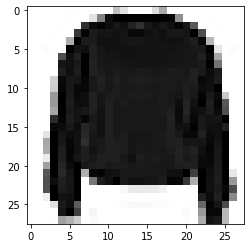

In [16]:
plt.imshow(train_images[7], cmap=plt.cm.binary)
plt.show()
# images are 28x28 arrays of pixels 0-255

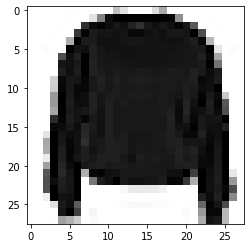

In [18]:
train_images = train_images/255.0
test_images = test_images/255.0
plt.imshow(train_images[7], cmap=plt.cm.binary)
plt.show()

In [19]:
# creating a model
# 784 (28 * 28) input layers
# 0-9 output layers - each one representing a class name
# 128 hidden layer 1 (fully connected)

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
# softmax = sum of prob for each class = 1

In [22]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# all of these may change based on problem

In [23]:
model.fit(train_images, train_labels, epochs=5)
# epoch: randomly pick images and corresponding labels, epoch=# times shown
# ordering of images affect the network

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 209us/sample - loss: 0.5009 - accuracy: 0.8240
Epoch 2/5
60000/60000 [==============================] - 13s 212us/sample - loss: 0.3802 - accuracy: 0.8619
Epoch 3/5
60000/60000 [==============================] - 13s 211us/sample - loss: 0.3374 - accuracy: 0.8765
Epoch 4/5
60000/60000 [==============================] - 9s 152us/sample - loss: 0.3128 - accuracy: 0.8850
Epoch 5/5
60000/60000 [==============================] - 12s 208us/sample - loss: 0.2956 - accuracy: 0.8915


In [34]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [26]:
print(test_acc)
print(test_loss)

0.8757
0.3480052166938782


In [30]:
# Making predictions using the model
prediction = model.predict(test_images)
print(prediction[0])

[1.0085005e-05 1.8652634e-07 3.0679701e-07 1.0242364e-07 3.3145805e-06
 2.8599550e-03 2.3352500e-06 1.2318077e-01 1.2865409e-04 8.7381434e-01]


In [33]:
index = np.argmax(prediction[0])
class_names[index]

'Ankle Boot'

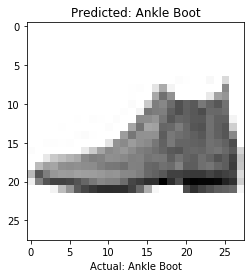

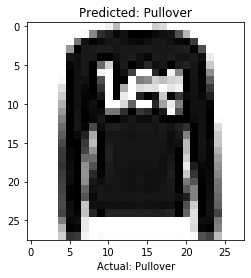

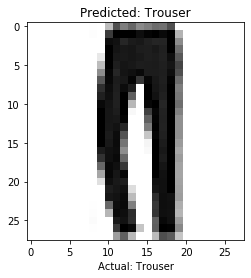

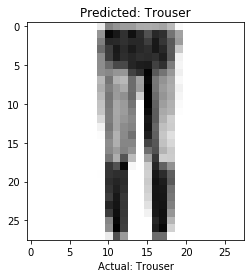

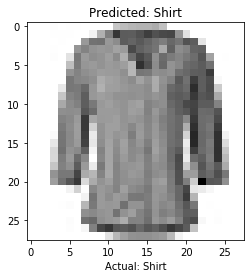

In [37]:
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + class_names[test_labels[i]])
    plt.title("Predicted: " + class_names[np.argmax(prediction[i])])
    plt.show()